# OpenCV - Podstawy #1 by Dawid Malarz

Spis treści:
    1. Jak widzą maszyny?
    2. Wczytywanie, wyświetlanie i zapisywanie zdjęć
    3. Program: Zamiana kolorowego zdjęcia na skalę szarości
    4. Zabawa z pikselami - Czyli 
    

# Importowanie bibliotek

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Jak widza maszyny? - Zdjęcia cyfrowe

https://www.youtube.com/watch?v=LWxu4rkZBLw

<img src="images/img1.jpg" width="500px">

Powyższe zdjęcie przedstawia jak obrazy są przetwarzana na w pełni kolorowe zdjęcia posiadające *3* kanały RGB, o których pisałem w artykule. W tym notebooku, będzie dużo praktyki, dlatego na początku załadujmy własne zdjęcie i sprawdźmy jakie parametry posiada. :) 

Typ danych:  uint8
Typ obiektu:  <class 'numpy.ndarray'>
Rozmiar:  (413, 620, 3)


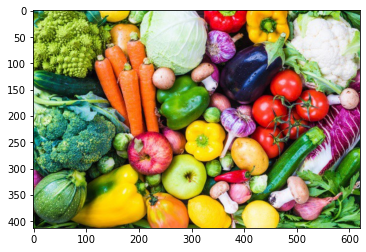

In [2]:
img = cv2.imread("images/przyklad1.jpg") # Wczytujemy zdjęcie, spokojnie nie musisz jeszcze rozumieć kodu ;)
plt.imshow(img[:,:,::-1]); # Wyświetlamy zdjęcie w formacie RGB
print("Typ danych: ", img.dtype)
print("Typ obiektu: ", type(img))
print("Rozmiar: ", img.shape)

Żeby lepiej zrozumieć co tak naprawdę kryje się za tym zdjęciem, wypisaliśmy podstawowe informacji. Pierwsza z nich to **Typ danych** uint8 - unsigned int8. Typ ten przyjmuje wartości dodanie od **0** do **255**. Następną informacją jaką posiadamy jest **Typ obiektu**, czyli typ danych w jakim przechowujemy nasz obraz. Jest to tablica pochodząca z biblioteki Numpy. Ostatnim elementem jest **Rozmiar**, który mówi nam kolejno o **wysokości**, **szerokości** i **liczbie kanałów**. 

W celu lepszego zapamiętania danych sprawdźmy podane przeze mnie inforamcje. 

### Typ danych uint8 - Zakres

In [3]:
print(np.uint8(256)) #Przypisuje do uint8 liczbę 256 => Licznik, wskazuje na 0
print(np.uint8(-1)) # Przypisuje do uint8 liczbę -1 => Licznik, wskazuje na 255 

0
255


### Typ obiektu - numpy.ndarray

In [4]:
print(img)

[[[165 184 103]
  [174 186 104]
  [189 190 104]
  ...
  [ 25  97  45]
  [ 30  98  45]
  [ 35  97  43]]

 [[145 169  85]
  [154 173  92]
  [165 178  98]
  ...
  [ 35  98  54]
  [ 40  96  53]
  [ 42  95  51]]

 [[ 68 104  20]
  [ 77 109  32]
  [ 75 102  29]
  ...
  [ 22  70  41]
  [ 21  68  36]
  [ 24  66  35]]

 ...

 [[ 48 135  47]
  [ 40 133  52]
  [ 26 124  54]
  ...
  [ 63 124  68]
  [  3  54  10]
  [  0  43   6]]

 [[ 45 137  48]
  [ 23 118  37]
  [ 21 117  47]
  ...
  [ 78 160  95]
  [ 77 151  99]
  [ 59 126  81]]

 [[ 39 141  53]
  [  6 104  22]
  [ 10  97  29]
  ...
  [ 96 192 121]
  [138 225 167]
  [114 196 144]]]


### Rozmiar

In [5]:
print(img[0][0]) # Odpowiednio B G R

[165 184 103]


# Podstawowe funkcje OpenCV - imread() imshow() imwrite()

### 1. cv2.imread(path, flag) 
#### Parametry:
    path = ścieżka do zdjęcia
    flag = sposób w jaki zdjęcie zostanie wczytane, domyślnie ustawione na cv2.IMREAD_COLOR

#### Rodzaje flag:
1. **cv2.IMREAD_COLOR** = Domyślna flaga, która wczytuje zdjęcie w kolorze, często używany alternatywny zapis **1**
2. **cv2.IMREAD_GRAYSCALE** = Wczytuje zdjęcie w skali szarości, alternatywnie **0**
3. **cv2.IMREAD_UNCHANGED** = Flaga, która wczytuje zdjęcie wraz z kanałem alfa, alternatywnie **-1**

#### Przykłady: 

In [6]:
def show_image(path, flag):
    img = cv2.imread(path, flag)
    plt.imshow(img);
    print("Typ danych: ", img.dtype)
    print("Typ obiektu: ", type(img))
    print("Wysokość: ", img.shape[0])
    print("Szerokość: ", img.shape[1])
    if(flag == 0):
        print("Liczba kanałów: ", 1)
    else: 
        print("Liczba kanałów: ", img.shape[-1])

Typ danych:  uint8
Typ obiektu:  <class 'numpy.ndarray'>
Wysokość:  600
Szerokość:  800
Liczba kanałów:  1


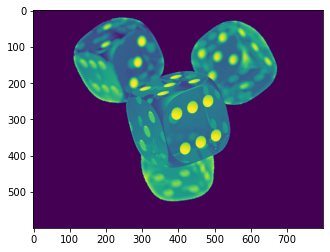

In [7]:
show_image("images/przyklad1_alpha.png", cv2.IMREAD_GRAYSCALE)

Typ danych:  uint8
Typ obiektu:  <class 'numpy.ndarray'>
Wysokość:  600
Szerokość:  800
Liczba kanałów:  3


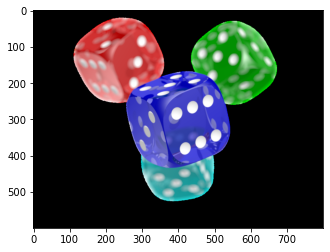

In [8]:
show_image("images/przyklad1_alpha.png", cv2.IMREAD_COLOR)

Typ danych:  uint8
Typ obiektu:  <class 'numpy.ndarray'>
Wysokość:  600
Szerokość:  800
Liczba kanałów:  4


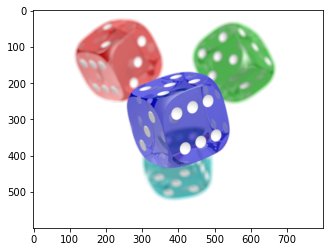

In [9]:
show_image("images/przyklad1_alpha.png", cv2.IMREAD_UNCHANGED)

### 2. cv2.imshow(window_name, image )
#### Parametry:
    window_name = nazwa okna
    image = zdjęcie, które chcemy wyświetlić

### 3. cv2.imshow(window_name, image )
#### Parametry:
    window_name = nazwa okna
    image = zdjęcie, które chcemy wyświetlić

# 3. Tworzenie własnych zdjęć, manipulacja pikselami

Wykorzystując funkcje z biblioteki Numpy stwórzmy własne zdjęcia. Pierwsze będzie całe czarne, drugie natomiast białe. Może nie jest to szczyt możliwości, ale bardzo ciekawy przykład pokazujący, jak to wszystko wygląda pod spodem. :) 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


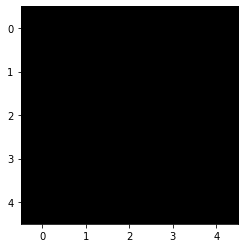

In [10]:
img_black = np.zeros((5,5,3), dtype="uint8")
plt.imshow(img_black);
print(img_black)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


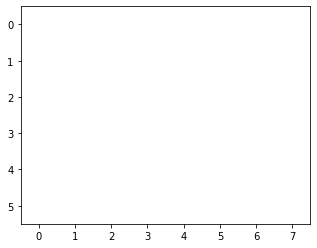

In [11]:
img_white = 255*np.ones((6,8,3),dtype='uint8')
plt.imshow(img_white);
print(img_white)

Udało się stworzyć dwa obrazy. Teraz chciałbym zmienić kolor kilku pikseli hmmm, może na pomarańczowy?

In [12]:
img_black[0,0] # Piksel o współrzędnych (0,0), który ma wartości [0,0,0]

array([0, 0, 0], dtype=uint8)

Pomarańczowy w postaci RGB ma wartości: Red = 252, Green = 186, Blue = 3. Teraz te wartości spróbujmy przypisać do naszego piksela i wyświetlić ponownie zdjęcie

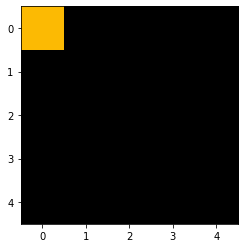

In [13]:
img_black[0,0] = [252,186,3] # Przypisanie wartości
plt.imshow(img_black); # Wyświetlanie zdjęcia

Wiemy już jak zmieniać wartość pojedynczego piksela, spróbujmy teraz zmienić cały pasek.

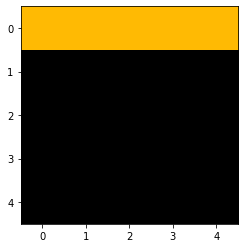

In [14]:
img_black[0,:] = [255,186,3]
plt.imshow(img_black);

## Ćwiczenie

Skoro już wiesz jak zmieniać wartości pikseli a także większe obszary to mam dla Ciebie ćwiczenie. Wykorzystując zdobytą już wiedzę a także wygenerowany obrazek **img_white** stwórz flagę naszego kraju 

In [15]:
# Miejsce na Twój kod

### Rozwiązanie ćwiczenia

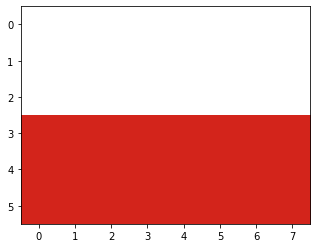

In [16]:
img_white[3:,:] = [211, 36, 27]
plt.imshow(img_white);

### Ćwiczenie - Dla ambitnych

Jeżeli chcesz jeszcze poćwiczyć to zachęcam Cię do zrobienia flagi Szwecji, wykorzystując poniższe zmienne

In [17]:
BLUE = [65, 106, 163]
YELLOW = [239, 204, 67]

<img src="images/sweden.png" width="500px">

In [18]:
# Twój kod

### Rozwiązanie

In [19]:
img_sweden = np.zeros((5,8,3), dtype="uint8")

# Ustawnie niebieskiego tła, dla całego zdjęcia
img_sweden[:,:] = BLUE

# Pasek poziomy
img_sweden[2,:] = YELLOW

# Pasek pionowy
img_sweden[:,2] = YELLOW

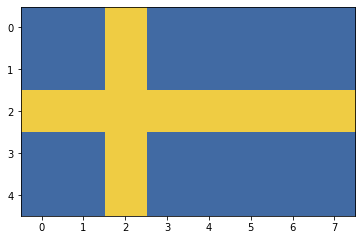

In [20]:
plt.imshow(img_sweden);

# Kadrowanie, Wstawianie, Kopiowanie

### Kadrowanie

Nauczyliśmy się już manipulować wartościami pikseli. Teraz pójdzmy o krok dalej i nauczymy się kadrować zdjęcia. Jest to prosta rzecz, jednak wymaga trochę praktyki. Zaczynamy

In [21]:
example2 = cv2.imread("images/przyklad2.jpg")
example2RGB = cv2.cvtColor(example2, cv2.COLOR_BGR2RGB)

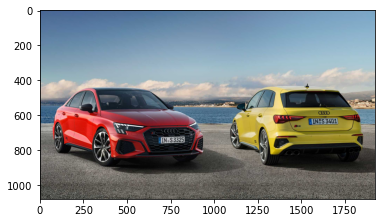

In [22]:
plt.imshow(example2RGB);

Chcielibyśmy, aby każdy z samochodów znalazł się na innym zdjęciu. Jak to zrobić? Ponownie wykorzystamy do tego działanie na macierzach, aby wprosty sposób wziąć pewny zakres pikseli i go skopiować. 

In [23]:
# Kadrowanie czerwonego samochodu:
# Współrzędne x: 0 do 1000
# Współrzędne y: 400 do 900
red_car = example2RGB[400:900, 0:1000]

# Kadrowanie czerwonego samochodu:
# Współrzędne x: 1000 do końca
# Współrzędne y: 400 do 900
yellow_car = example2RGB[400:900,1000:]

### Czerwony samochód

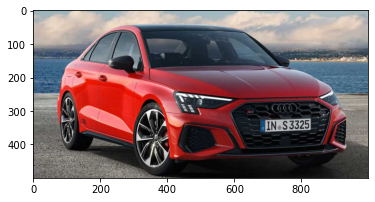

In [24]:
plt.imshow(red_car);

### Żółty samochód

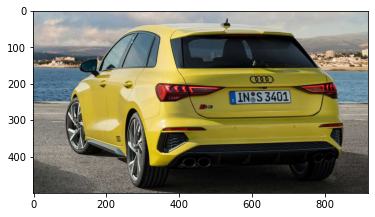

In [25]:
plt.imshow(yellow_car);

### Wstawianie

Teraz dowiedzmy się trochu więcej w jaki sposób można wstawiać wycięty/wykadrowany obraz do innego zdjęcia. Jak się możesz domyślać, nie będzie to trudne, ale jest to kolejna rzecz, którą warto przećwiczyć w praktyce. Wykorzystajmy do tego zdjęcie z folderu **images** o nazwie **przyklad3.jpeg**. Spróbuj je wczytać i wyświetlić za pomocą **matplotlib**

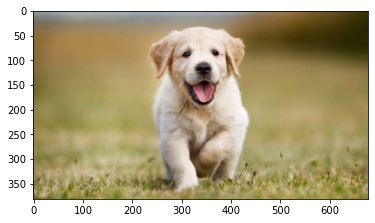

In [26]:
example1 = cv2.imread("images/przyklad3.jpeg")
example1RGB = cv2.cvtColor(example1, cv2.COLOR_BGR2RGB)
plt.imshow(example1RGB);

#### Krok 1: Wycinanie

Wytnijmy na początku fragment, na którym jest nasz słodki piesek. Zrobimy to w dokładnie taki sam sposób było w przypadku samochodów

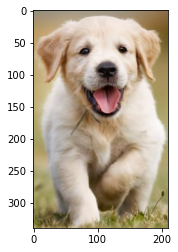

In [27]:
dog = example1RGB[25:365, 230:440]
plt.imshow(dog);

In [28]:
example1RGB[25:365, 10:220] = dog

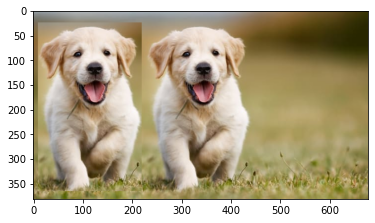

In [29]:
plt.imshow(example1RGB);

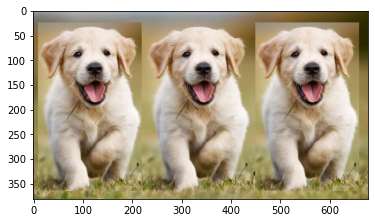

In [30]:
example1RGB[25:365, 450:660] = dog
plt.imshow(example1RGB);

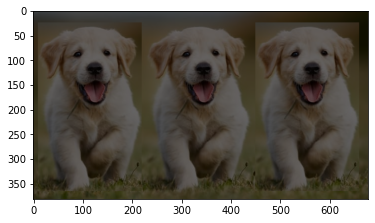

In [46]:
procent = -60
img = example1RGB * (1 + procent/100)
contrast_image = np.clip(img, 0, 255)
contrast_image_uint8 = np.uint8(contrast_image)
contrast_image_normalized = (example1RGB * (1 + procent/100))/255
plt.imshow(contrast_image_normalized);